<h1><center> <b>Estática y Dinámica (IN1053C)</b></center></h1>

<h4><center>MSc. Alejandro Saavedra</center></h4>

<h3><center> <b> Animación del movimiento de un proyectil </b></center></h3>

In [3]:
#Módulos de Python a utilizar:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.style.use('bmh')            #Estilo de los gráficos.

<h3><left> <b>Marco conceptual:</b> </left></h3>

Considere las coordenadas $(x,y)$ de una partícula que describe un movimiento parabólico:
$$
\begin{aligned}
x(t) &= x_i + v_i \cos(\alpha) (t - t_i), \\
y(t) &= y_i + v_i \sin(\alpha) (t-t_i) - \frac{g}{2} (t - t_i)^2,
\end{aligned}
$$
donde $x_i$, $y_i$ son las coordenadas de la posición inicial, $v_i$ es el módulo de la velocidad inicial, $\alpha$ el ángulo de lanzamiento, $t_i$ el tiempo inicial y $g = 9,8 \ {\rm m/s^2}$ es la magnitud de la aceleración de gravedad. 

El vector posición de la partícula queda entonces descrito por 
$$\vec{r} = x(t) \, \hat{\imath} + y(t) \, \hat{\jmath}.$$

Por otro lado, su velocidad y aceleración están dados, respectivamente, por los siguientes vectores:
$$
\begin{aligned}
\vec{v} &= v_i \cos(\alpha) \hat{\imath} + \left(v_i \sin(\alpha) - g (t - t_i)\right) \hat{\jmath}, \\
\vec{a} &= - g \, \hat{\jmath}.
\end{aligned}
$$

<b>Observación:</b> Note que si $\alpha = 90^{\circ}$ y $x_i = 0$, recuperamos el movimiento de una partícula describiendo un lanzamiento vertical en el eje $y$. Si además, $v_i = 0$, la partícula describe una caída libre. 

In [9]:
#1) Parámetros:

#Condiciones iniciales (modificar sólo esta parte):
t_i = 0         #[s]
x_i = 2         #[m]
y_i = 1       #[m]
v_i = 10        #[m/s]
alpha = 45      #grados sexagesimales

alpha_rad = np.pi*alpha/180
g = 9.8        #[m/s^2]

In [10]:
#2) Componentes de la posición y velocidad:

def pos(t):
    x = x_i + v_i*np.cos(alpha_rad)*(t - t_i)
    y = y_i + v_i*np.sin(alpha_rad)*(t - t_i) - 0.5*g*(t - t_i)**2

    return x,y

def velo(t):
    v_x = v_i*np.cos(alpha_rad)
    v_y = v_i*np.sin(alpha_rad) - g*(t - t_i)
    
    return v_x,v_y


In [11]:
#3) Cantidades características del movimiento parabólico:

#Tiempo donde alcanza la altura máxima y el tiempo de vuelo:
t_max = t_i + v_i*np.sin(alpha_rad)/g
t_vuelo = t_i + (np.sqrt(v_i**2*np.sin(alpha_rad)**2 + 2*g*y_i) + v_i*np.sin(alpha_rad))/g

In [ ]:
#4) Variables para graficar la trayectoria completa:
N = 400                             #Número de puntos de la partición del intervalo de tiempo.
t_T = np.linspace(t_i,t_vuelo,N)    #El intervalo de tiempo empieza desde el tiempo inicial hasta el tiempo de vuelo.
x_T, y_T = pos(t_T)                 #Arreglo con las coordenadas x e y de la trayectoria

In [ ]:
#Importar el módulo para hacer animaciones:
import matplotlib.animation as animation

In [ ]:
#5) Función que actualiza los frames:
def update(i,t):
    ax.clear()     #Clear axis

    #5.1) Coordenadas de la posición y velocidad en el tiempo t:
    x,y = pos(t[i])
    v_x, v_y = velo(t[i])         

    #5.2) Gráfica de la trayectoria:
    plt.plot(x_T,y_T,color = 'black',linewidth = 1.6,alpha = 0.7)

    #5.3) Posición inicial y posición en el tiempo t:
    plt.scatter(x_i,y_i,s = 40,marker = 'o',linewidth = 1.2,color = 'green', edgecolors='black',zorder = 3,label = 'Posición Inicial')
    plt.scatter(x,y,s = 40,marker = 'o',linewidth = 1.2,color = 'red', edgecolors='black',zorder = 3)

    #5.4) Redimensión del gráfico para la caída libre y el lanzamiento vertical:
    if (0 <= x_i and x_i < 0.1 and alpha == 90):
        x_max = 0.1
        y_max = pos(t_max)[1]
    
    else:
        #Altura máxima y distancia recorrida en x:
        x_max = pos(t_vuelo)[0]
        y_max = pos(t_max)[1]

    #5.5) Gráfico del vector posición:
    
    #Vector posición:
    tail = [0,0]              #Inicio del vector posición    
    q_1 = plt.quiver(*tail,x,y,angles="xy",scale_units="xy",scale=1,facecolor='firebrick',headaxislength = 4,width = 0.006,zorder = 4)
        
    #Texto de las coordenadas x e y en el tiempo t:
    text_kwargs1 = dict(ha='center', va='center', fontsize=15, color='black')
    x_txt = r'$'+str(round(x,5))+'$'
    y_txt = r'$'+str(round(y,5))+'$'
    plt.text(1.2*x_max, y_max, r'$x = $' + x_txt,**text_kwargs1, bbox = dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))
    plt.text(1.2*x_max, 0.85*y_max , r'$y = $' + y_txt,**text_kwargs1,bbox = dict(boxstyle="round",ec=(1., 0.5, 0.5),fc=(1., 0.8, 0.8)))

    #5.6) Gráfico del vector velocidad:
        #Vector velocidad:
    tail_v = [x,y]              #Inicio del vector velocidad
    q_1 = plt.quiver(*tail_v,v_x,v_y,angles="xy",scale_units="xy", scale = 10, linewidth = 0.5,facecolor='navy',headaxislength = 4,width = 0.006,zorder = 2)

    #Texto de las componentes v_x y v_y en el tiempo t:
    text_kwargs = dict(ha='center', va='center', fontsize=15, color='black')
    v_x_txt = r'$'+str(round(v_x,5))+'$'
    v_y_txt = r'$'+str(round(v_y,5))+'$'
    plt.text(1.2*x_max, 0.7*y_max, r'$v_x = $' + v_x_txt,**text_kwargs,bbox = dict(boxstyle="round",ec=(0.4, 0.6, 1.0),fc=(0.8, 0.9, 1.0)))
    plt.text(1.2*x_max, 0.55*y_max , r'$v_y = $' + v_y_txt,**text_kwargs,bbox = dict(boxstyle="round",ec=(0.4, 0.6, 1.0),fc=(0.8, 0.9, 1.0)))

    #5.7) Estética del plot:
    ax.set_facecolor("white")
    plt.grid(False)

    if (0 <= x_i and x_i < 0.1 and alpha == 90):
        plt.xlim(-0.1,0.1)

    else:
        plt.xlim(0,1.05*x_max)
        
    plt.ylim(0,1.1*y_max)

    plt.xlabel(r'$x \ {\rm (m)}$',fontsize = 15)
    plt.ylabel(r'$y \ {\rm (m)}$',fontsize = 15)
    plt.legend(loc = 'best')

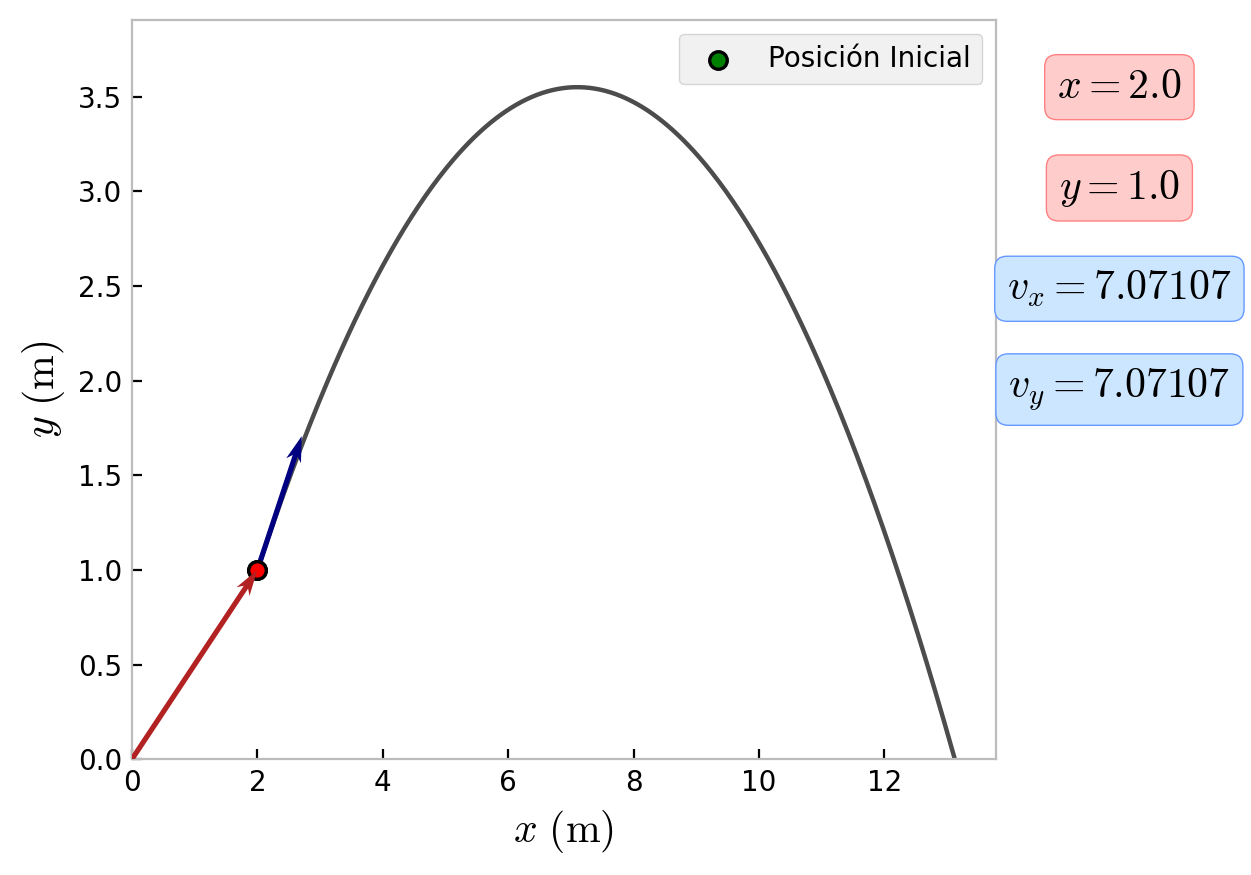

In [ ]:
#6) Creación de la figura y ejes que contienen la animación:
fig, ax = plt.subplots(dpi=200)
fig.subplots_adjust(right=0.8) 

anim = animation.FuncAnimation(fig, func = update, fargs = (t_T,), frames = len(t_T), interval = 1)
anim.save('Projectile-Motion.gif')